In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df=df.dropna()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [9]:
df.shape

(202, 12)

In [10]:
import matplotlib.pyplot as plt

In [11]:
value=df['Survived'].groupby(df['Age']).count()
l=[]
for i,j in value.items():
    l.append(int(i))

Text(0.5, 1.0, 'AGE survived rate')

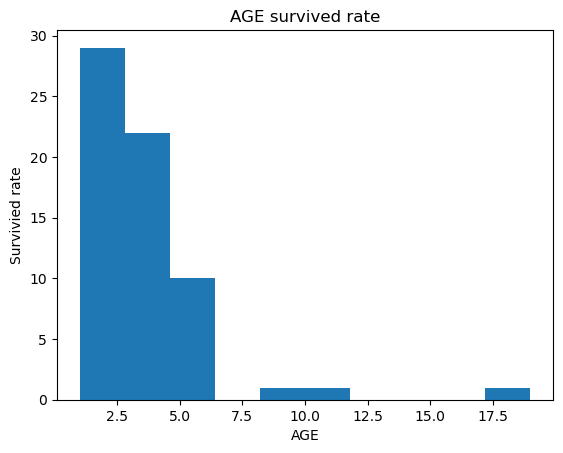

In [12]:
plt.hist(value.values,label=l)
plt.xlabel("AGE")
plt.ylabel("Survivied rate")
plt.title("AGE survived rate")

In [13]:
from collections import Counter

In [14]:
male,female=Counter(df['Sex'])['male'],Counter(df['Sex'])['female']
male,female

(107, 95)

In [15]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

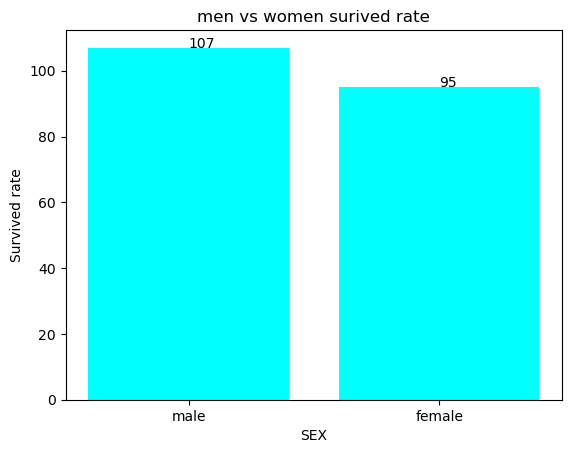

In [39]:
plt.bar(['male','female'],[male,female],color='cyan')
plt.xlabel("SEX")
plt.ylabel("Survived rate")
plt.title('men vs women surived rate')
addlabels(['male','female'],[male,female])

In [17]:
male_sex=df['Sex'][df['Sex']=='male'].groupby(df['Survived']).count()
male_sex

Survived
0    62
1    45
Name: Sex, dtype: int64

Text(0.5, 1.0, 'men surived rate')

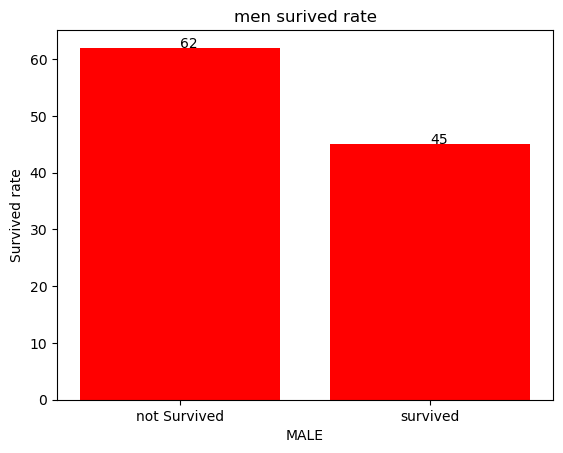

In [40]:
plt.bar(['not Survived','survived'],male_sex.values,color='red')
addlabels(['not Survived','survived'],male_sex.values)
plt.xlabel("MALE")
plt.ylabel("Survived rate")
plt.title('men surived rate')

In [19]:
female_sex=df['Sex'][df['Sex']=='female'].groupby(df['Survived']).count()
female_sex

Survived
0     6
1    89
Name: Sex, dtype: int64

Text(0.5, 1.0, 'men surived rate')

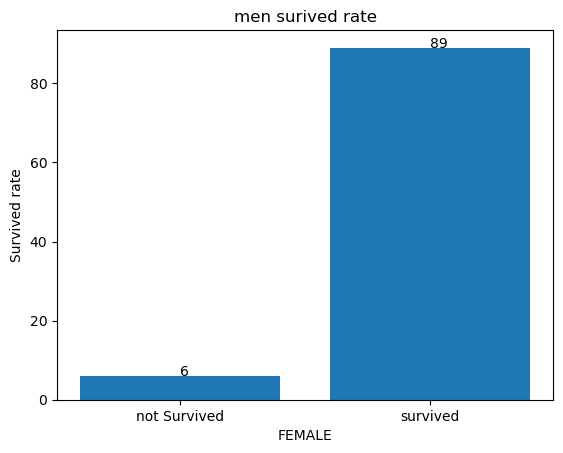

In [20]:
plt.bar(['not Survived','survived'],female_sex.values)
addlabels(['not Survived','survived'],female_sex.values)
plt.xlabel("FEMALE")
plt.ylabel("Survived rate")
plt.title('men surived rate')

In [21]:
df['Ticket'].unique()

array(['PC 17599', '113803', '17463', 'PP 9549', '113783', '248698',
       '113788', '19950', 'PC 17569', 'PC 17572', '113509', '19947',
       '36973', 'C.A. 29395', '348123', 'W.E.P. 5734', 'PC 17754',
       'PC 17759', '35281', '110465', 'PC 17558', '27267', '2668',
       '11752', 'PC 17593', '230080', '113776', '113505', '111240',
       '17764', 'PC 17595', '230136', '113767', 'PC 17610', '347054',
       '112277', '35273', '11813', '19943', '19928', '11751', '113514',
       '110152', '110413', '112059', 'PC 17582', 'PC 17760', 'PC 17596',
       '13502', '113056', '11967', 'SC/Paris 2163', '113781', '19988',
       '226593', 'PC 17758', 'PC 17485', '11767', 'PC 17608', '36928',
       '16966', '28551', '111361', '113043', '113784', '248733', '113510',
       '110813', 'PC 17477', '11765', '113503', '113760',
       'SOTON/O.Q. 392078', '110564', '13507', '33638', '113786',
       '113051', '17453', '13509', '17464', '19952', '111320',
       'SC/AH Basle 541', '11771', '11378

In [22]:
ticket=df['Survived'].groupby(df['Ticket']).count()
l=[]
for i,j in ticket.items():
    l.append(i)

In [23]:
max(ticket)

4

(array([94.,  0.,  0., 35.,  0.,  0., 10.,  0.,  0.,  2.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

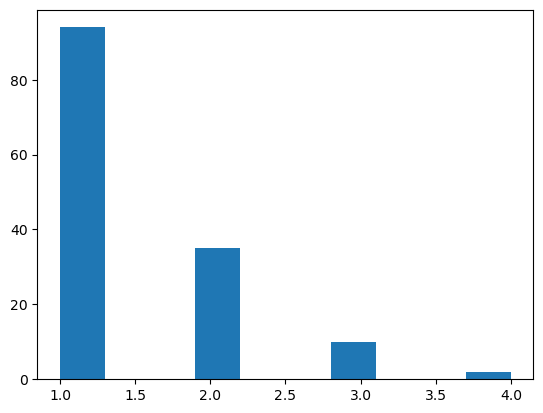

In [24]:
plt.hist(ticket.values,label=l)

In [25]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
classes=Counter(df['Pclass'])
l=[]
for i,j in classes.items():
    l.append(j)
classes

Counter({1: 174, 3: 12, 2: 16})

Text(0.5, 1.0, 'Count of Pclass')

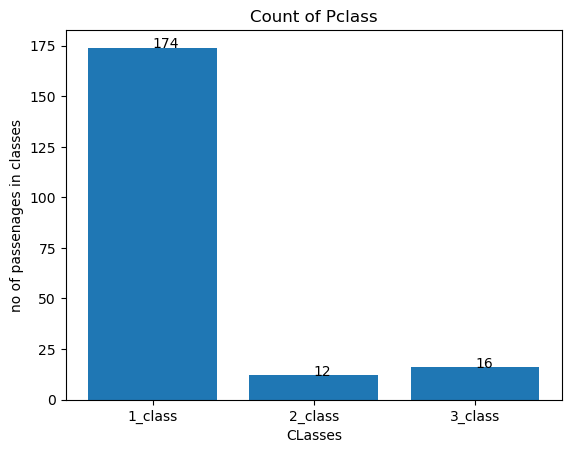

In [27]:
plt.bar(["1_class","2_class","3_class"],l)
addlabels(["1_class","2_class","3_class"],l)
plt.xlabel("CLasses")
plt.ylabel("no of passenages in classes")
plt.title("Count of Pclass")

In [28]:
max(df['Fare']),min(df['Fare'])

(512.3292, 0.0)

(array([159.,  26.,  15.,   0.,   2.]),
 array([  0.     , 102.46584, 204.93168, 307.39752, 409.86336, 512.3292 ]),
 <BarContainer object of 5 artists>)

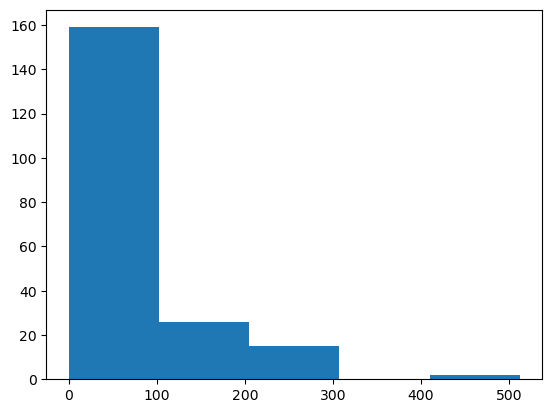

In [29]:
plt.hist(df['Fare'],bins=5)

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le=LabelEncoder()
df['Cabin']=le.fit_transform(df['Cabin'])
df['Pclass']=le.fit_transform(df['Pclass'])
df['Sex']=le.fit_transform(df['Sex'])

In [32]:
x=df.loc[:,['Age','Cabin','Fare','Sex','Pclass']]
y=df['Survived']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [37]:
lr.predict(x_test)

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1],
      dtype=int64)

In [38]:
lr.score(x_test,y_test)

0.8292682926829268